<a href="https://colab.research.google.com/github/marziabil/social-impact/blob/main/survey_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas nltk wordcloud

In [ ]:
#access google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/AI-Generated Art & Social Causes csv.csv'


In [ ]:
import pandas as pd
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Timestamp,Age,Gender,Impact - Climate Change,Depth - climate change,Awareness - climate change,Emotions - climate change,What do you think is the subject of this image?,Actions - climate change,Improvements - climate change,...,What do you think is the subject of this image?.1,Actions - mental health,Improvements - mental health,Impact - Poverty,Depth - poverty,Awareness - poverty,Which of the following emotions does the image evoke in you the most?.1,What do you think is the subject of this image?.2,Actions - poverty,Improvements - poverty
0,2023/08/23 7:18:01 PM GMT+4,25-34,Female,Somewhat effective,Somewhat deep,To a moderate extent - The artwork somewhat in...,Fear,NaN,Reduce single-use plastic consumption;Plant tr...,Show plastic bags surrounding the tree,...,NaN,Practice self-care routines that prioritize me...,Nothing,Not very effective,Neutral,To a limited extent - The artwork minimally in...,Sadness,NaN,I am not inspired to take any action,Make this clearer
1,2023/08/23 7:22:36 PM GMT+4,18-24,Male,Somewhat effective,Very deep,To a limited extent - The artwork minimally in...,Sadness,NaN,Plant trees or support reforestation efforts;E...,less greener the picture,...,NaN,Encourage individuals struggling with mental h...,more scary the picture should,Somewhat effective,Somewhat deep,Neutral - The artwork had no significant impac...,Sadness,NaN,Support local charities;Offer skills and servi...,NaN
2,2023/08/23 7:24:49 PM GMT+4,18-24,Female,Somewhat effective,Somewhat deep,Neutral - The artwork had no significant impac...,Sadness,NaN,Plant trees or support reforestation efforts;E...,NaN,...,NaN,I am not inspired to take any action,I cant understand whats going on in this picture,Not very effective,Not very deep,Not at all - The artwork did not contribute to...,Sadness,NaN,I am not inspired to take any action,Can’t understand whats going on heren
3,2023/08/23 7:42:19 PM GMT+4,25-34,Male,Neutral,Neutral,Neutral - The artwork had no significant impac...,No such emotion,NaN,I am not inspired to take any action,A bit more clear message through use of some o...,...,NaN,Practice self-care routines that prioritize me...,Clear message on which emotions has to be conv...,Somewhat effective,Somewhat deep,To a moderate extent - The artwork somewhat in...,Sadness,NaN,I am not inspired to take any action,"Nothing, it's good"
4,2023/08/23 9:40:28 PM GMT+4,18-24,Female,Somewhat effective,Somewhat deep,Neutral - The artwork had no significant impac...,Sadness,NaN,Educate others about environmental issues,maybe adding some blood will make it more rela...,...,NaN,I am not inspired to take any action,did not understand this one,Not very effective,Not very deep,Not at all - The artwork did not contribute to...,Sadness,NaN,Share the artwork on social media platforms,maybe add some other character to show the com...


In [ ]:
!pip install pandas nltk wordcloud


In [ ]:
import pandas as pd
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt


In [ ]:
import re

columns_to_analyze = ['Improvements - poverty', 'Improvements - mental health', 'Improvements - climate change']

# combine columns
df['combined_responses'] = df[columns_to_analyze].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Drop rows where the combined response is empty
df = df[df['combined_responses'].notna()]

In [ ]:
# Download NLTK resources (run once)
nltk.download('stopwords')
nltk.download('punkt')

# Define a function for text cleaning and preprocessing
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenization
    words = word_tokenize(text)
    # Remove stopwords and non-alphabetic characters
    words = [word for word in words if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(words)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Apply the cleaning function to each response
cleaned_responses = df['combined_responses'].apply(clean_text)

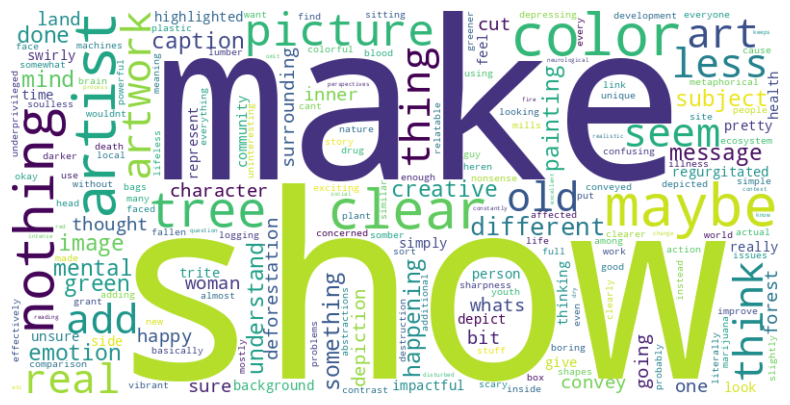

In [ ]:
# Combine all cleaned responses into a single string
all_text = ' '.join(cleaned_responses)

# Plot word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from collections import Counter

# Concatenate all responses into a single string
all_text = ' '.join(cleaned_responses)

# Tokenize the text into words
words = all_text.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Print the most common words and their counts
print(word_counts.most_common(10))

[('make', 8), ('show', 8), ('maybe', 7), ('like', 7), ('could', 7), ('nothing', 6), ('clear', 6), ('artist', 6), ('picture', 5), ('colors', 5)]


Sentiment **analysis**

In [ ]:
pip install pandas nltk transformers

In [ ]:
from transformers import pipeline

sentiment_classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
df['sentiment'] = df['combined_responses'].apply(lambda x: sentiment_classifier(x)[0]['label'])


In [ ]:
sentiment_distribution = df['sentiment'].value_counts()
print(sentiment_distribution)


NEGATIVE    23
POSITIVE    21
Name: sentiment, dtype: int64


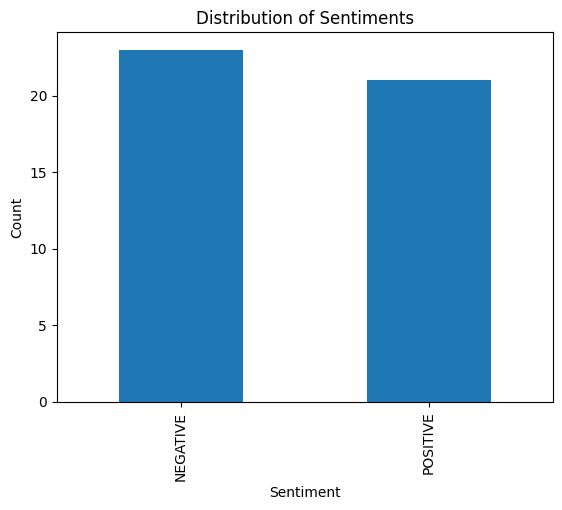

In [ ]:
import matplotlib.pyplot as plt

sentiment_distribution.plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
sentiment_by_group = df.groupby('Age')['sentiment'].value_counts(normalize=True)
print(sentiment_by_group)


Age    sentiment
18-24  POSITIVE     0.533333
       NEGATIVE     0.466667
25-34  NEGATIVE     0.590909
       POSITIVE     0.409091
35-44  POSITIVE     0.666667
       NEGATIVE     0.333333
45-54  NEGATIVE     1.000000
Name: sentiment, dtype: float64


In [ ]:
sentiment_by_group = df.groupby('Gender')['sentiment'].value_counts(normalize=True)
print(sentiment_by_group)


Gender                                                                       sentiment
Assigned male at birth, yet planning to transition to non binary or female   NEGATIVE     1.000000
Female                                                                       NEGATIVE     0.571429
                                                                             POSITIVE     0.428571
Genderfluid                                                                  POSITIVE     1.000000
Male                                                                         POSITIVE     0.571429
                                                                             NEGATIVE     0.428571
Name: sentiment, dtype: float64


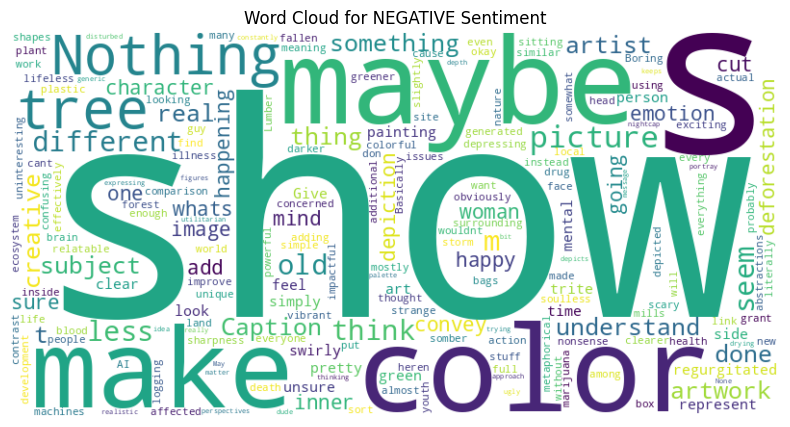

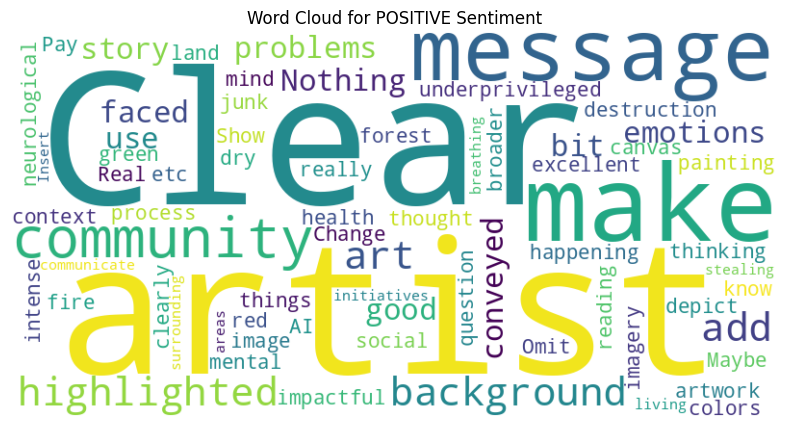

In [ ]:
from wordcloud import WordCloud

for sentiment in df['sentiment'].unique():
    text = ' '.join(df[df['sentiment'] == sentiment]['combined_responses'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()
